# TP N1 Modelo cinemático y odometrı́a en robot de tracción diferencial



## Parte 1: Cálculos analíticos

Se tiene como dato que la distancia entre ruedas del robot es de $b=0.450m$ y el radio de cada rueda es de $R_{rueda}=0.140m$. Además, cada rueda puede desarrollar una velocidad máxima de $2m/s$. 

Teniendo en cuenta las limitaciones impuestas arriba, se plantea primero la ecuación que relaciona el radio de la trayectoria, las velocidades angulares y las lineales:

$$R_{trayectoria} = \frac{v}{\omega} \quad(1)$$

Además se cumple que:

$$v = R (\frac{\omega_R+\omega_L}{2}) \quad; \quad \omega = R(\frac{\omega_R-\omega_L}{b}) \quad (2)$$


Reemplazando el par de ecuaciones $(2)$ en $(1)$ y reordenando se tiene que:


$$v_R = v_L \cdot \frac{R_{trayectoria}+b/2}{R_{trayectoria}-b/2} \quad (3)$$


De $(3)$ obtenemos $v_R$ fijando los valores $v_L = 1m/s$ y $R_{trayectoria} = 1m$, determinando que $v_R = 1.58m/s$.


Con estos datos se calculan las velocidades angulares de cada rueda para luego determinar las velocidades del centro odométrico del robot:

$$v_L = R \omega_L \rightarrow \omega_L = 7.14rad/s$$
$$v_R = R \omega_R \rightarrow \omega_R = 11.28rad/s$$


Finalmente, la velocidad lineal del centro odométrico es determinada con la segunda ecuación del par (2):

$$ \omega = R(\frac{\omega_R-\omega_L}{b}) = 0.140m \cdot \frac{11.28 m/s - 7.14 m/s}{0.45m} = 1.29 rad/s$$





## Parte 2: Simulación del robot RoMAA en Gazebo

#### 1.Generar un registro (log) de odometría y velocidad del robot con el robot en movimiento mediante teleoperación por teclado. Para ello ejecutar nuevamente la simulación y utilizar el script dump_odom.py. 
El script generó el log *log2.txt*, el cual contiene 6 columnas:
    1. Tiempo
    2. Coordenada x
    3. Coordenada y
    4. Orientacion en rad/s
    5. Velocidad lineal en m/s
    6. Velocidad angular en m/s
    


#### 2. Escribir un script en Python que cargue los datos del archivo de log y genere gráficos de: i) el camino seguido por el robot, ii) la trayectoria (pose respecto al tiempo) y iii) la velocidad del robot respecto al tiempo.

Para ello, se escribió un script de Python llamado *log-py.py*:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np


data = [] #lista donde se van guardar las diferentes variables 
#Lee archivo
with open('circle.txt', 'r') as file:
    for line in file: #bucle que recorre todas las filas
        line = line.strip().split() #divide las columnas
        time = float(line[0]) #primera columna
        x = float(line[1]) #segunda columna y asi sucesivamente
        y = float(line[2]) 
        orientation = float(line[3])
        linear = float(line[4])
        angular = float(line[5])
        data.append((time, x, y, orientation, linear, angular)) #a la misma posicion de la lista se guardan las 6 variables dependientes del tiempo


Luego recorre la lista *data* a medida que corre el script:

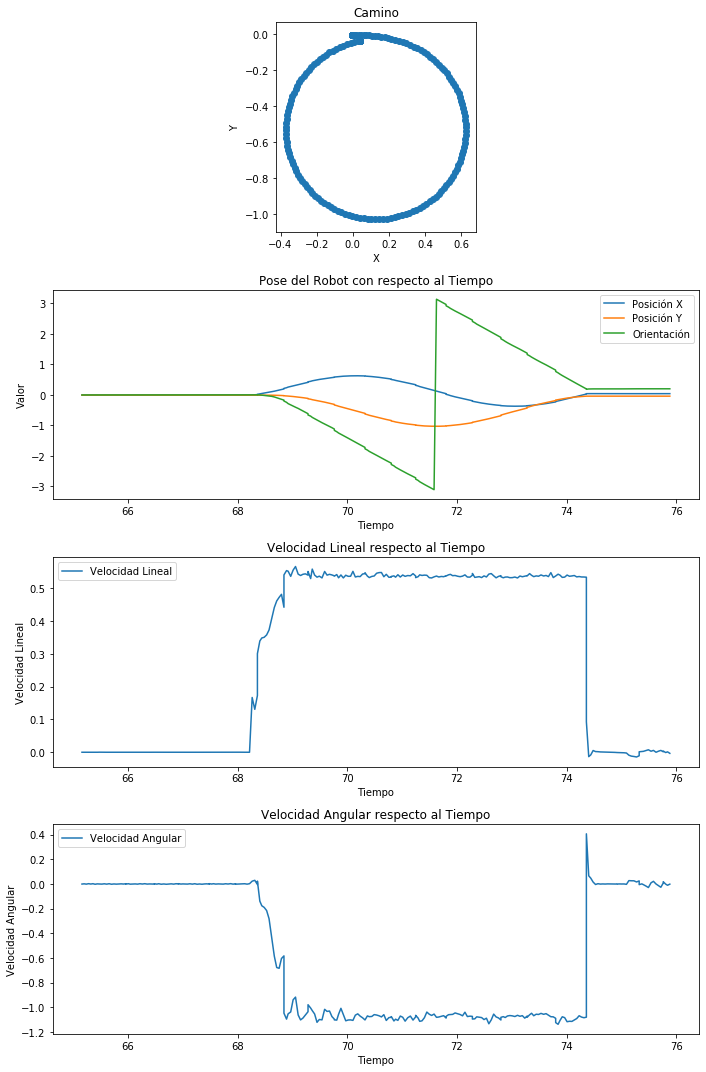

In [2]:
time_values = [item[0] for item in data]
x_values    = [item[1] for item in data]
y_values    = [item[2] for item in data]
or_values   = [item[3] for item in data]
lin_values  = [item[4] for item in data]
ang_values  = [item[5] for item in data]
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

axs[0].scatter(x_values, y_values) #toma los valores x e y
axs[0].set_xlabel('X') #etiqueta los ejes 
axs[0].set_ylabel('Y')
axs[0].set_title('Camino') #titulo del gráfico
axs[0].set_aspect('equal') #setea el tamaño en un cuadrado


axs[1].plot(time_values, x_values, label='Posición X') 
axs[1].plot(time_values, y_values, label='Posición Y') 
axs[1].plot(time_values, or_values, label='Orientación')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor')
axs[1].set_title('Pose del Robot con respecto al Tiempo')
axs[1].legend()


axs[2].plot(time_values, lin_values, label='Velocidad Lineal')
axs[2].set_xlabel('Tiempo')
axs[2].set_ylabel('Velocidad Lineal')
axs[2].set_title('Velocidad Lineal respecto al Tiempo')
axs[2].legend()

axs[3].plot(time_values, ang_values, label='Velocidad Angular')
axs[3].set_xlabel('Tiempo')
axs[3].set_ylabel('Velocidad Angular')
axs[3].set_title('Velocidad Angular respecto al Tiempo')
axs[3].legend()

plt.tight_layout()
plt.show()

Finalmente va mostrando los diferentes gráficos:

#### 3. Obtener otro registro de datos para un camino circular del robot y gráficar el camino y la trayectoria. Marcar tres puntos cualquiera en el gráfico del camino del robot y sus correspondientes puntos en la trayectoria. Elegir puntos que no se correspondan con el inicio o el final del camino.
Como en el primer punto, se realizó el log con *dump-odom.py*, esta vez guardandolo en un archivo llamado *circle.txt*, obteniendo asi un camino circular.
Para el ploteo del camino y la generación de puntos sobre el gráfico, se realizó otro script llamado *points_marker.py*.


Se procede de la misma manera que en el script anterior, pero se generarán 3 puntos para guardar las diferentes variables:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

data = []
p1 = []
p2 = []
p3 = []

#Lee archivo
with open('circle.txt', 'r') as file:
    for line in file:
        line = line.strip().split()
        time = float(line[0])
        x = float(line[1]) 
        y = float(line[2]) 
        orientation = float(line[3])
        linear = float(line[4])
        angular = float(line[5])
        data.append((time, x, y, orientation, linear, angular))  

datalen = len(data)

time_values = [item[0] for item in data]
x_values    = [item[1] for item in data]
y_values    = [item[2] for item in data]
or_values   = [item[3] for item in data]
lin_values  = [item[4] for item in data]
ang_values  = [item[5] for item in data]


Luego, se generan 3 puntos aleatorios sobre el camino, y se asigna cada variable para luego plotearla:

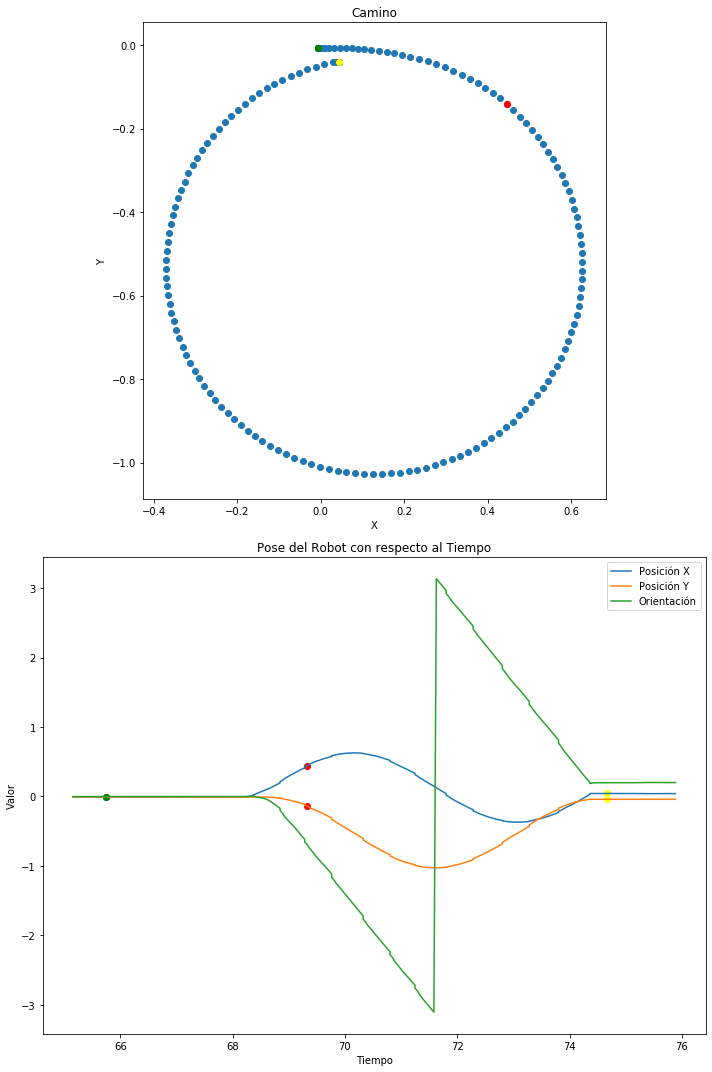

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

p1 = data[random.randint(1, datalen-1)]
p2 = data[random.randint(1, datalen-1)]
p3 = data[random.randint(1, datalen-1)]

p1_time = p1[0]
p1_x = p1[1]
p1_y = p1[2]

p2_time = p2[0]
p2_x = p2[1]
p2_y = p2[2]

p3_time = p3[0]
p3_x = p3[1]
p3_y = p3[2]

axs[0].scatter(x_values, y_values)
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].scatter(p1_x, p1_y, color = 'red')
axs[0].scatter(p2_x, p2_y, color = 'green')
axs[0].scatter(p3_x, p3_y, color = 'yellow')
axs[0].set_title('Camino')
axs[0].set_aspect('equal')


axs[1].plot(time_values, x_values, label='Posición X')
axs[1].plot(time_values, y_values, label='Posición Y')
axs[1].plot(time_values, or_values, label='Orientación')
axs[1].scatter(p1_time, p1_x, color = 'red')
axs[1].scatter(p2_time, p2_x, color = 'green')
axs[1].scatter(p3_time, p3_x, color = 'yellow')
axs[1].scatter(p1_time, p1_y, color = 'red')
axs[1].scatter(p2_time, p2_y, color = 'green')
axs[1].scatter(p3_time, p3_y, color = 'yellow')
axs[1].set_xlabel('Tiempo')
axs[1].set_ylabel('Valor')
axs[1].set_title('Pose del Robot con respecto al Tiempo')
axs[1].legend()

plt.tight_layout()
plt.show()



Finalmente se procede de la misma manera graficando camino y puntos:

#### 4. En base a los gráficos anteriores:
#### ¿Cuáles son los rangos de valores de las coordenadas x e y y por qué?
#### ¿Cuál es el rango de valores de la orientación del robot y por qué?
En primera instancia, para el camino cuadrado, los rangos de valores serán acotados al manejo que le demos nosotros, debido a que se controlaba a través de publicaciones de un mensaje de tipo Twist, el cual estaba procesado por las flechas del teclado. En el camino circular, el rango de las coordenadas estará delimitado por la velocidad angular del centro odométrico del robot. Por lo tanto, no podrá salir del radio que establece esa velocidad angular.
En segundo lugar, la orientacion del robot para el camino cuadrado cambiará de 90° en 90°. Para el camino circular, el irá variando progresivamente de $-\pi$ a $\pi$, como podemos ver en el gráfico de orientación. La orientación estará acotada a esos valores para ambos casos.

#### 5. Obtener diferentes registros y gráficos para caminos circulares con diferentes valores (positivos y negativos) de velocidades lineales y angulares (utilizar todas las combinaciones de signos posibles). Indicar en los gráficos el sentido de avance del robot.

Para ello se escribió otro script de python llamado *circle_paths.py*, el cual tendrá cargada la ruta de acceso de todos los logs generados, y a partir del numero que le ingresemos, mostrará el camino requerido:

Para un camino horario, ingresar un numero del 0 al 6, para un camino antihorario ingresar del 7 al 9:7


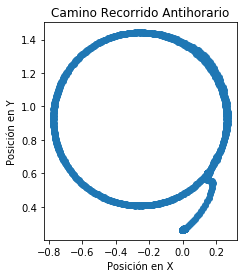

In [7]:
import matplotlib.pyplot as plt

# Leer el archivo generado por dump_odom.py y extraer los valores
data = []
cwPath1 = 'cw_0.5linear_0.49angular.txt'
cwPath2 = 'cw_0.5linear_1.0angular.txt'
cwPath3 = 'cw_0.5linear_2.14angular.txt'
cwPath4 = 'cw_0.15linear_1.0angular.txt'
cwPath5 = 'cw_0.23linear_0.49angular.txt'
cwPath6 = 'cw_1.07linear_1.0angular.txt'
cwPath7 = 'cw_1.52linear_2.04angular.txt'

ccwPath8 = 'ccw_0.5linear_1.0angular.txt'
ccwPath9 = 'ccw_0.15linear_1.0angular.txt'
ccwPath10 = 'ccw_1.07linear_1.0angular.txt'

pathList = [cwPath1, cwPath2, cwPath3, cwPath4, cwPath5, cwPath6, cwPath7, ccwPath8, ccwPath9, ccwPath10]

pathNumber = int(input("Para un camino horario, ingresar un numero del 0 al 6, para un camino antihorario ingresar del 7 al 9:"))

getPath = pathList[pathNumber]
with open(getPath, 'r') as file:
    for line in file:
        line = line.strip().split() 
        x = float(line[1]) 
        y = float(line[2])  
        orientation = float(line[3]) 
        data.append((x, y, orientation)) 

x_values = [item[0] for item in data]
y_values = [item[1] for item in data]

fig, ax = plt.subplots()


ax.plot(x_values, y_values, '-o')


if(pathNumber <= 6):
    sentido = 'Horario'
else:
    sentido = 'Antihorario'
ax.set_aspect('equal')
ax.set_xlabel('Posición en X')
ax.set_ylabel('Posición en Y')
ax.set_title('Camino Recorrido ' + sentido)


plt.show()

#### 6. Describir cuál sería la secuencia de comandos de velocidad a aplicar al robot para seguir uno de los caminos mostrado a continuación (elegir sólo uno).
![hola](notebooks/square_path1.png)

Para ello necesitaremos un algoritmo que se repita 4 veces, debido a que tiene 4 lados del cuadrado para recorrer y un giro de 90° a realizar. Se supone que se empezará por el vertice inferior izquierdo, y se recorrerá el camino en forma antihorario.

1. Se realiza una publicación de tipo Twist para recorrer el primer lado, estableciendo la velocidad lineal en $1 m/s$ queriendo recorrerlo en 2 segundos:

In [6]:
rostopic pub /cmd_vel geometry_msgs/msg/Twist "{linear: {x: 1.0, y: 0.0, z: 0.0}, angular: {x: 0.0, y: 0.0, z: 0.0}}"

SyntaxError: invalid syntax (<ipython-input-6-7d466c2f4076>, line 1)

2. Luego se deberá para el robot en el vertice inferior derecho, por lo tanto:

In [ ]:
rostopic pub /cmd_vel geometry_msgs/msg/Twist "{linear: {x: 0.0, y: 0.0, z: 0.0}, angular: {x: 0.0, y: 0.0, z: 0.0}}"

3. Se realiza el giro sobre si mismo, por lo tanto se establecerá $z=0.785 rad/s$ para realizar el giro de 90° en 2 segundos:

In [ ]:
rostopic pub /cmd_vel geometry_msgs/msg/Twist "{linear: {x: 0.0, y: 0.0, z: 0.0}, angular: {x: 0.785, y: 0.0, z: 0.0}}"

4. Como en el punto 2, se para el robot:

In [ ]:
rostopic pub /cmd_vel geometry_msgs/msg/Twist "{linear: {x: 0.0, y: 0.0, z: 0.0}, angular: {x: 0.0, y: 0.0, z: 0.0}}"

Este algoritmo se repetirá 4 veces para recorrer el camino de inicio a fin.

#### 7. Completar el script *square_path.py* para que el robot el robot RoMAA-II simulado en Gazebo pueda ejecutar el camino cuadrado mostrado en el punto anterior.

Para realizar este punto se tomó el algoritmo del punto 6 y se pasó a Python completando el script donde hacía falta, el cual quedaría:

In [ ]:
       # Completar el código
        vel = Twist()
        count = 0
        while(count < 4):
            vel.linear.x = 1.0 #setea velocidad lineal en 1 m/s
            vel.angular.z = 0.0 #velocidad angular en 0 debido a que recorre un tramo derecho
            self.pub.publish(vel) #publicación del mensaje tipo Twist en el tópico /cmd_vel
            rospy.sleep(2.0) #delay de 2 segundos que establece el tiempo de recorrido

            vel.linear.x = 0.0 #seteo ambas velocidades en 0 para realizar el giro de 90°
            vel.angular.z = 0.0 
            self.pub.publish(vel)
            rospy.sleep(0.5)

            vel.linear.x = 0.0 
            vel.angular.z = 0.785 # en rad/seg, establezco el giro de 90° en 2 segundos 
            self.pub.publish(vel)
            rospy.sleep(2)

            vel.linear.x = 0.0 
            vel.angular.z = 0.0 # en rad/seg, establezco el giro de 90° en 2 segundos 
            self.pub.publish(vel)
            rospy.sleep(0.5)
            count+1

        # FIN: fija velocidad 0

## Parte 3: Práctica con robot EduRoMAA


1. Para realizar el movimiento pedido se realizaron las funciones `stopped`, `moveForward` y `moveBackward`:



```c++
    void moveForward(unsigned long ms){
	PWM = STOP;

	while(PWM <= 254){
		analogWrite(MOTOR_DER, PWM);
		analogWrite(MOTOR_IZQ, PWM);
		delay((unsigned long)((ms/4)/127));
		PWM = PWM + 1;
	}	

	delay((unsigned long)(((ms/2))));
	

	while(PWM >= 128){
		analogWrite(MOTOR_DER, PWM);
		analogWrite(MOTOR_IZQ, PWM);
		delay((unsigned long)(((ms/4)/127)));
		PWM = PWM - 1;
	}
}
```




``` c++ 
    void moveBackward(unsigned long ms){
	PWM = STOP;

	while(PWM >= 1){
		analogWrite(MOTOR_DER, PWM);
		analogWrite(MOTOR_IZQ, PWM);
		delay((unsigned long)((ms/4)/127));
		PWM = PWM - 1;
	}
	PWM = 0;
  analogWrite(MOTOR_DER, PWM);
  analogWrite(MOTOR_IZQ, PWM);  
	delay((unsigned long)((ms/2)));
	
	while(PWM <= 125){
		analogWrite(MOTOR_DER,PWM);
		analogWrite(MOTOR_IZQ,PWM);
		delay((unsigned long)((ms/4)/127));
		PWM = PWM +1;
	}
}
```




```c++
   void halt(unsigned long ms){
	analogWrite(MOTOR_DER, STOP);
	analogWrite(MOTOR_IZQ, STOP);
	delay(ms);
} 
```

El bucle principal del programa llama a las funciones anteriores de la siguiente forma:

```c++
    void loop(){
        halt(2000);
        moveForward(2000);
        halt(2000);
        moveBackward(2000);
    }

```

2. Para que el motor realice una trayectoria cuadrada, se agregó la función que sigue para realizar giros sobre el eje del motor:

```c++
   void twist(int ms){
	
	PWM1 = 128;
    PWM2 = 126;
  
	while(PWM1 <= 254){

    if(PWM1 == 128){
      PWM1 = PWM1 + 1;
      PWM2 = 126;
      }
    else{
      PWM1 = PWM1 + 1;
      PWM2 = ~PWM1;
      }
		analogWrite(MOTOR_DER,  PWM1);
		analogWrite(MOTOR_IZQ,  PWM2);
		delay((unsigned long)((ms/4)/127));
	}	


	PWM1 =  255;
  PWM2 = ~PWM1;
	analogWrite(MOTOR_DER,  PWM1);
	analogWrite(MOTOR_IZQ,  PWM2);
	delay((unsigned long)(((ms/2)/127)));
	

	while(PWM1 >= 128){
		PWM1 =  PWM1 - 1;
    PWM2 = ~PWM1;
    analogWrite(MOTOR_DER,  PWM1);
    analogWrite(MOTOR_IZQ,  PWM2);
    delay((unsigned long)(((ms/4)/127)));
	}

}  
```

Luego, el bucle del programa se implementa de la siguiente manera:

```c++
void loop(){

  moveForward(1000);
  halt(2500);
  
  twist(1000);
  halt(500);
  
  moveForward(1000);
  halt(2500);
  
  twist(1000);
  halt(2500);
  
  moveForward(1000);
  halt(2500);  
  
  twist(1000);
  halt(2500);

  moveForward(1000);
  halt(2500);

}
```

3. 

    1. En este caso los valores de las acciones de control usados son 
    2. Se puede observar que es muy dificil que el robot siga una trayectoria predecible. Al realizarse los movimientos sin ningún tipo de información como realimentación para determinar su posición y orientación los movimientos carecen de precisión
    3. No. El robot luego de varios ciclos no vuelve al punto de partida
    4. Aproximadamente pero no de forma exacta

4.  